# Welcome to the Chemical Clocks Module

### A chemical clock is a type of chemical reaction that literally runs like clockwork. With many of these reactions, you can determine the chemical composition just by timing the reaction!

- Here we will use Python to simulate the Belousov-Zhabotinsky (BZ) reaction. There are many different BZ reactions using different chemicals, but they all follow the same behavior.

- This interesting reaction is "oscillatory". In the video you are about to see you will notice the color of the reaction mixture changing from red to green and then back again.

- The math we will be using was developed at the University of Oregon! If you're curious about it, open this link in a new tab: http://www.scholarpedia.org/article/Oregonator

# <font color='red'>_WARNING_</font>
# <font color='red'>The chemicals used in the reactions you're about to see are hazardous. Do not attempt to recreate these reactions without adult supervision and proper personal protective equipment (goggles, gloves, etc.)</font>

## Click the arrow on the left of the next cell TWICE to begin.
## (This is how you'll be running blocks of code)

In [27]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/8xSqvlkL1hk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## As you can see, the color change happens QUICKLY, but at regular times. Click the arrow on the next box to watch a video of a different BZ reaction.

- You'll notice it takes longer for the color to change.
- When they speed up this video to 400x you can't even see the color change!

In [25]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/07n2WGg4WTc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## The next video shows how the first reaction is made.
## <font color='red'>__AGAIN, DO NOT TRY THIS AT HOME__</font>
## <font color='red'>You WILL get hurt if you touch these chemicals.</font>

In [26]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kw9wF-GNjqs" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#### This module will show you how you can write code to model interesting science like this! And the best part?

# You don't have to be "good" at math to do this!!!

#### If someone has given you the equations you need, all you need to do is write them into the code and the computer does all the work for you!

In [4]:
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################
########################INSERT FIGURE WITH THE EQUATIONS########################

### You won't understand these equations unless you've taken a college-level math class (but you don't need to understand them here).

### You only need to understand a few important things:
- The "fractions" tell us how fast the reaction is happening (basically how fast the color is changing). We call these the "rates" of reaction.
- There are a bunch of chemicals floating around in that beaker, but the only chemicals that matter are chemical X, chemical Y and chemical Z.
- The little x, little y and little z tell us how much of each chemical is in the mixture. All of the other letters are just numbers we get to choose.

## Let's get started! Click the arrows next to each block as you go through the module

#### First, we need to tell Python where to look for the code we'll need. This code is stored in a so-called "library".
#### To access the code in these libraries, we tell Python to "import" the code.
#### I wrote in some comments if you're curious about what the libraries are for. You can learn more about them by searching them on Google (or your favorite search engine).

In [1]:
#######################This stuff is for all the fun buttons you'll be clicking#######################

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#######################This is for the pictures I put in here######################################
from IPython.display import Image

###################These tell python where to find the math stuff it needs and how to make plots######
get_ipython().run_line_magic('matplotlib', 'inline')
import math
import random
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import numpy as np

## The next few blocks show the reactions we'll be thinking about, and how we record the parameters in the code.
#### The parameters are just numbers the computer will need to solve the equations.
#### The following table shows the steps in one kind of BZ reaction. The model we're using simplifies this.
#### The k's on the right side of this table are called "rate constants". These tell us how fast each step will happen.
## Don't worry too much about understanding this.

![Image of Reactions](http://www.scholarpedia.org/w/images/4/48/Table1.jpg)

In [12]:
def initialize(pH, x, y, z, A, B, timeStep, T):
    
    #These are the rate constants for the reaction.
    #R indicates the forward reaction (r for "right")
    #L indicates the reverse reaction (l for "left)
    
    kR1 = 8e9   #M^-2*s^-1
    kL1 = 110   #s^-1
    kR2 = 3e6   #M^-2*s^-1
    kL2 = 2e-5  #M^-1*s^-1
    kR3 = 2     #M^-3*s^-1
    kL3 = 3.2   #M^-1*s^-1
    kR4 = 3e3   #M^-1*s^-1
    kL4 = 1e-8  #M^-2*s^-1
    kR5 = 42    #M^-2*s^-1
    kL5 = 2.2e3 #s^-1
    kR5a = 7.4e4 #s^-1
    kL5a = 1.4e9 #M^-1*s^-1
    kR6 = 8e4   #M^-2*s^-1
    kL6 = 8.9e3 #M^-1*s^-1
    
    f = 1
    kc = 1
    #This is pretty messy right? The Oregonator model makes things WAY more simple!
    #We're going to make things simple by introducing new rate constants!
    
    H = 10**(-pH)
    
    k1 = kR3*H**2    
    k2 = kR2*H
    k3 = kR5*H
    k4 = kR4*H
    
    #Here are our scaling factors:
    
    q = 2*k1*k4/(k2*k3)
    epsilon = kc*B/(k3*A)
    eprime = 2*kc*k4*B/(k2*k3*A)
    
    #Here are our scaled initial concentrations for X, Y, and Z:
    #x0 = 1.0 #2*k4*X/(k3*A)
    #y0 = 1.0 #k3*Y/(k3*A)
    #z0 = 1.0 #kc*k4*B*Z/(k3*A)**2
    
    #Finally, here's where the model figures out how many scaled timesteps to run for:
    N = math.floor(T/timeStep) #Floor because computers start counting at 0
    
    params = {'q':q, 
              'f':f,
              'epsilon' : epsilon,
              'eprime' : eprime,
              'x0' : x,
              'y0' : y,
              'z0' : z,
              'T' : T,
              'N' : N}
    
    #print(k3*A/(2*k4))
    #print(k3*A/(k3))
    #print((k3*A)**2/(kc*k4*B))
    
    return params

## Those complicated equations from before don't seem so bad once we put them into our code, as you'll see in the next block.

#### The first function in the next block is what our equations look like in the code.
#### The second function tells the computer how to solve those equations.

In [3]:
#The rRate function (short for "reaction rate") computes the rates for the system as an array

def rRate(u, t, q, f, epsilon, eprime):
    
    x, y, z = u
    
    rx = (q*y - x*y + x*(1 - x))/epsilon
    ry = (-q*y - x*y + f*z)/eprime
    rz = x - z
    
    r = [rx, ry, rz]
    
    return r


#The "concs" (short for "concentrations") function solves the equations

def concs(prms):
    
    q = prms.get('q')
    f = prms.get('f')
    eprime = prms.get('eprime')
    epsilon = prms.get('epsilon')
    T = prms.get('T')
    N = prms.get('N')
    
    #We will have u0 hold the initial concentrations
    u0 = [prms.get('x0'), prms.get('y0'), prms.get('z0')]
    
    
    #Time points to solve at:
    t = np.linspace(0, T, num = N)
    
    #Here is where it all comes together
    sol = odeint(rRate, u0, t, args = (q, f, epsilon, eprime))
    
    return sol, t

# Now we get to have some fun! Like real scientists, you're going to change the parameters.

- The pH measures the acidity of the reaction solution. As you'll see, this needs to be VERY acidic (low pH). You don't want to touch this with your bare hands.
- x, y, and z are the amounts of the three chemicals that make the color change happen.
- A and B are "helper" chemicals called catalysts. Without them, the reaction wouldn't happen

- Finally, we need to tell the computer how much time we want the reaction to run. It does this multiplying those equations from - before by a "time step" (a really small amount of time) a bunch of times.
- You can think about this like filming a movie. The camera takes a bunch of pictures really fast, and when you flip through the pictures it looks like they're moving.
- Like filming a movie, this will only work if you take A LOT of pictures.

# Run the next block, then click and drag the scrollers to set the parameters:
- Set the pH to 0.10 (this would hurt if it got on your skin)
- Set x, y, and z to 1.00 (just drag the scroller all the way to the right).
- Set A = 0.06
- Set B = 0.02

- Set the timeStep to 0.0001 (this is not in seconds, as we'll see soon)
- Set T = 30. This means there the computer will solve the equations for 300,000 time steps!

### Now, let's take those numbers we chose and have the computer tell us what will happen:

In [13]:
chosen_params = interact(initialize,
                          pH = (0,1,0.01),
                          x = (0.1,1,0.1),
                          y = (0.1,1,0.1),
                          z = (0.1,1,0.1),
                          A = (0.01,0.1,0.01),
                          B = (0.01,0.1,0.01),
                          timeStep = [0.0001, 0.001, 0.1],
                          T = (10, 50,1))

interactive(children=(FloatSlider(value=0.0, description='pH', max=1.0, step=0.01), FloatSlider(value=0.5, des…

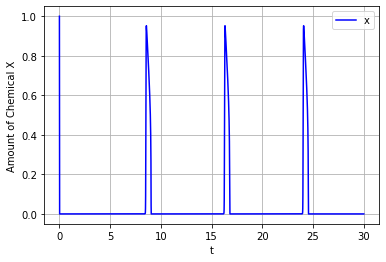

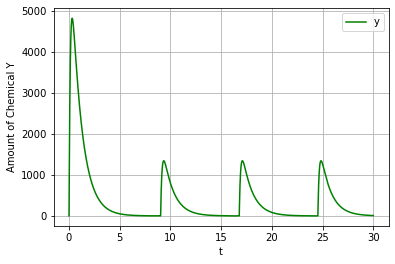

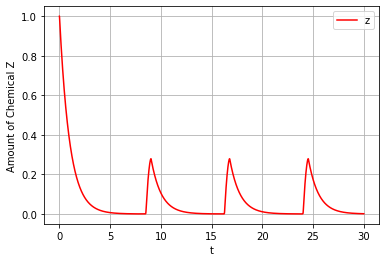

In [29]:
solution, time = concs(chosen_params.widget.result)

plt.plot(time, solution[:, 0], 'b', label='x')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Amount of Chemical X')
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.ylabel('Amount of Chemical Y')
plt.xlabel('t')
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best')
plt.ylabel('Amount of Chemical Z')
plt.xlabel('t')
plt.grid()
plt.show()

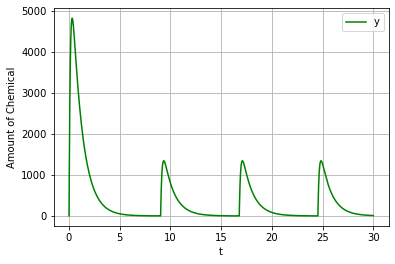

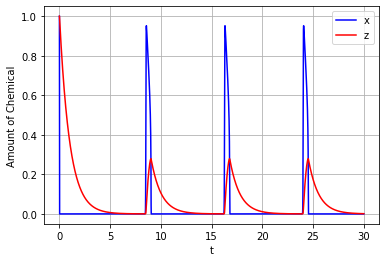

In [30]:
plt.plot(time, solution[:, 1], 'g', label='y')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Amount of Chemical')
plt.grid()
plt.show()
##############################################
##############################################

plt.plot(time, solution[:, 0], 'b', label='x')
plt.plot(time, solution[:, 2], 'r', label='z')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Amount of Chemical')
plt.grid()
plt.show()